The United States of America has many more COVID-19 cases and deaths than any other country.

This is an investigation on the number of COVID-19 cases and deaths through a comparison of the individual states comprising the United States against similar populated countries around the world. Through the reported numbers, the pandemic appears to have spread through the United States faster than that which is seen in European, Asian and African countries. 

I will take a look at the states in the Union (based on population and number of cases) and compare them to similar sized (by population and number of cases) countries and see if the United States are doing better or worse in controlling the spread of COVID-19.

The workflow will be as follows;

1. Download US population by state/county (US Census)
2. Download COVID-19 statistics (WHO)
3. Download Worldwide population (ECDC)
4. Integrate all datasets into one for visualisation.

In [3]:
from load_from_url import load_data
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = load_data()

# Comparison of Covid19 cases: Global vs United States

## Import United States Population
http://www2.census.gov

## WHO COVID-19 statistics
https://covid19.who.int/table

## European Centre for Disease Prevention and Control
https://www.ecdc.europa.eu/en

## Merge WHO and ECDC data

## Combine the US population (States) with the COVID-19 cases / deaths

## Append the US State data with the Worldwide data

# Visualisations

Barplot showing countries with the highest recorded totals of deaths through COVID-19

<AxesSubplot:title={'center':'Deaths: Cumulative total'}>

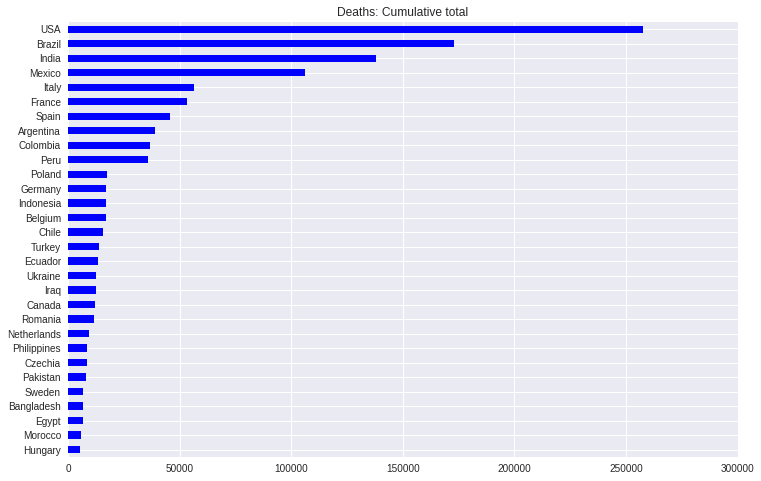

In [5]:
df1 = df[df['continentExp']=='US State'].sum()
df1['continentExp']='USA'
df1.name = 'USA'
df1 = df.append(df1)

p = df1[df1['continentExp']!='US State'].sort_values(by='Deaths - cumulative total', ascending=True)['Deaths - cumulative total'].tail(30)
p.plot(kind='barh',
       figsize=(12,8),
       xlim=(0,300000),
      title='Deaths: Cumulative total',
      color='blue');

Scatter plot of the same data.  USA is the bronze coloured marker.  They have the highest number of cases and the highest number of deaths as a result of COVID-19.

<AxesSubplot:xlabel='Deaths - cumulative total', ylabel='Cases - cumulative total'>

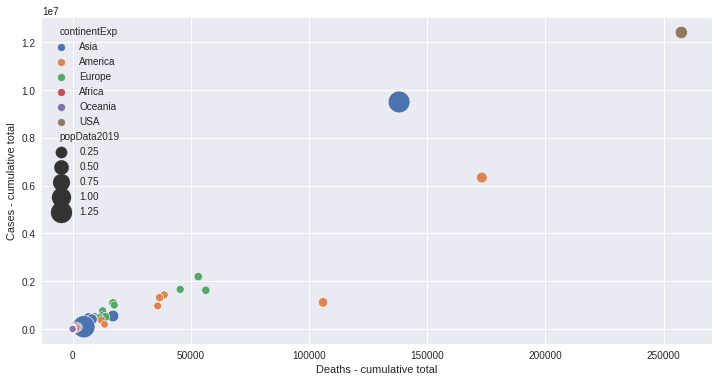

In [6]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1[df1['continentExp']!='US State'],
x="Deaths - cumulative total",
y="Cases - cumulative total",
hue="continentExp",
size='popData2019',
sizes=(50,500),
palette='deep')


To appreciate how many more cases and deaths have occurred in the USA, I have broken it down to the individual states.

<AxesSubplot:xlabel='Cases - cumulative total', ylabel='Deaths - cumulative total'>

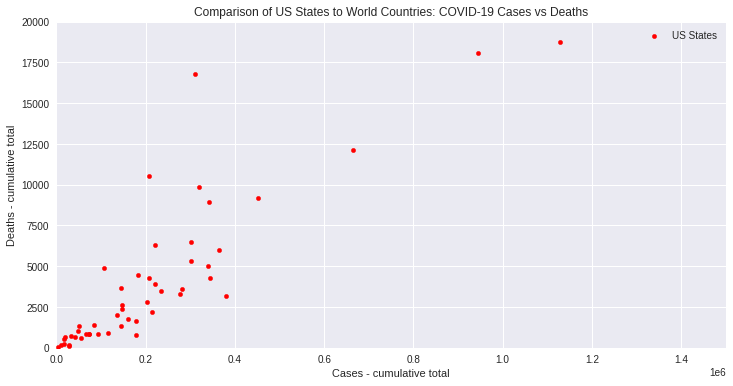

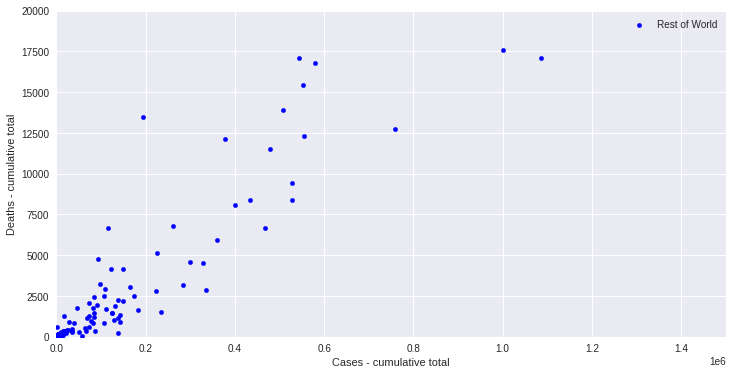

In [7]:
df[df['continentExp']=='US State'].plot(kind='scatter', x='Cases - cumulative total',
                                       y='Deaths - cumulative total',
                                       xlim=[0,1500000],
                                       ylim=[0,20000],
                                       color='red',
                                        label='US States',
                                       legend=True,
                                       figsize=(12,6),
                                       title='Comparison of US States to World Countries: COVID-19 Cases vs Deaths')

df[df['continentExp']!='US State'].plot(kind='scatter', x='Cases - cumulative total',
                                       y='Deaths - cumulative total',
                                       xlim=[0,1500000],
                                       ylim=[0,20000],
                                        color='blue',
                                       label='Rest of World',
                                       legend=True,
                                       figsize=(12,6),)

<AxesSubplot:xlabel='Cases - cumulative total per 1 million population', ylabel='Deaths - cumulative total per 1 million population'>

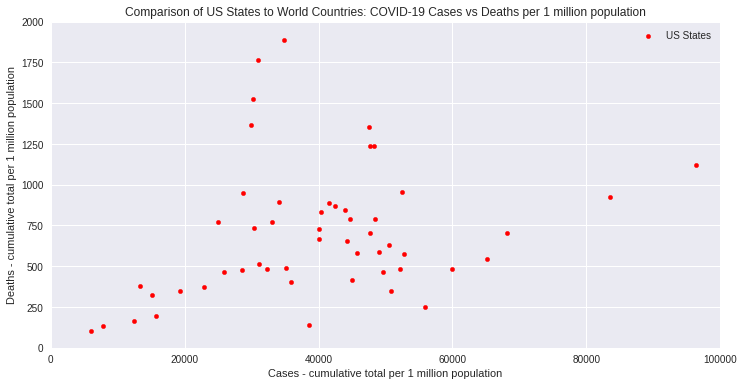

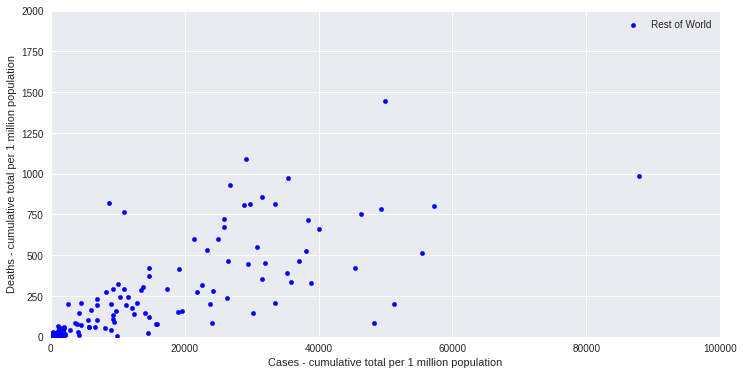

In [8]:
df[df['continentExp']=='US State'].plot(kind='scatter', x='Cases - cumulative total per 1 million population',
                                       y='Deaths - cumulative total per 1 million population',
                                       xlim=[0,100000],
                                       ylim=[0,2000],
                                       color='red',
                                        label='US States',
                                       legend=True,
                                       figsize=(12,6),
                                       title='Comparison of US States to World Countries: COVID-19 Cases vs Deaths per 1 million population')

df[df['continentExp']!='US State'].plot(kind='scatter', x='Cases - cumulative total per 1 million population',
                                       y='Deaths - cumulative total per 1 million population',
                                       xlim=[0,100000],
                                       ylim=[0,2000],
                                        color='blue',
                                       label='Rest of World',
                                       legend=True,
                                       figsize=(12,6),)


<AxesSubplot:title={'center':'Cases (US states): cumulative total per 1 million population'}>

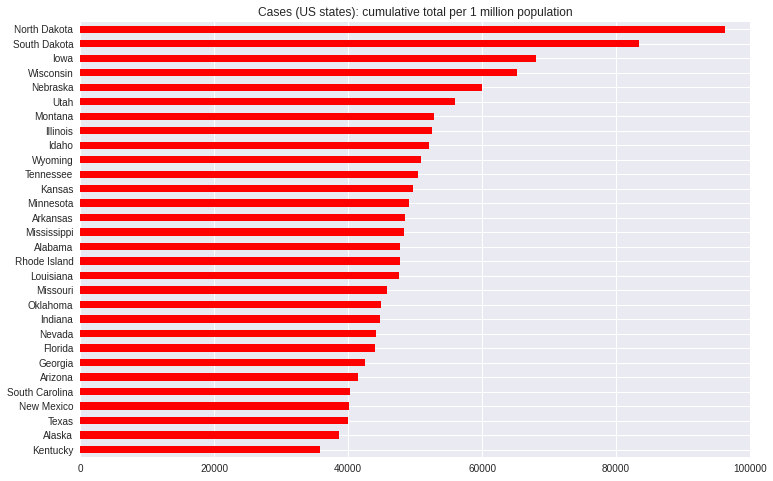

In [12]:
q = df[df['continentExp']=='US State'].sort_values(by='Cases - cumulative total per 1 million population', ascending=True)['Cases - cumulative total per 1 million population'].tail(30)
q.plot(kind='barh',
       figsize=(12,8),
       xlim=(0,100000),
       color='red',
      title='Cases (US states): cumulative total per 1 million population');

<AxesSubplot:title={'center':'Cases (countries, non-US): Cumulative total per 1 million population'}>

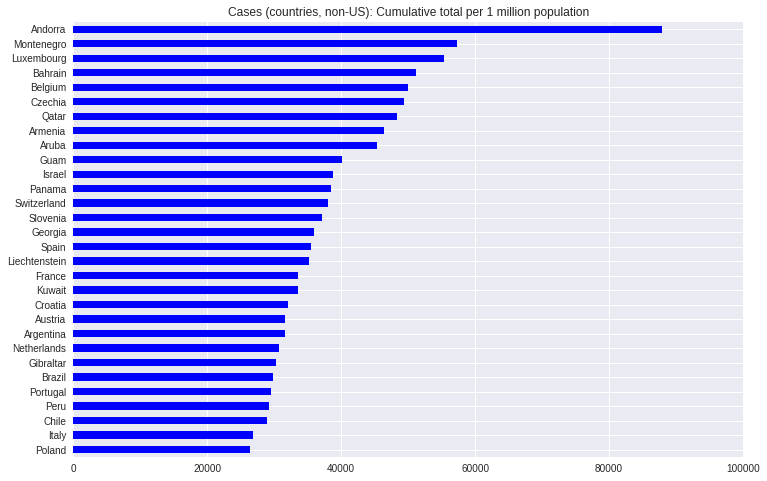

In [13]:
q = df[df['continentExp']!='US State'].sort_values(by='Cases - cumulative total per 1 million population', ascending=True)['Cases - cumulative total per 1 million population'].tail(30)
q.plot(kind='barh',
       figsize=(12,8),
       xlim=(0,100000),
       color='blue',
      title='Cases (countries, non-US): Cumulative total per 1 million population');

# Summary
It is clear that the United States is much more affected than other countries throughout the world. States have much higher proportions of cases and deaths than similarly populated countries.